# `Heart Disease Prediction`

# Import - Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df_origin = pd.read_csv('heart.csv')
df = df_origin.copy()


# EDA 

In [5]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
836,65,M,ASY,135,254,0,LVH,127,N,2.8,Flat,1
65,37,F,ATA,120,260,0,Normal,130,N,0.0,Up,0
750,46,F,NAP,142,177,0,LVH,160,Y,1.4,Down,0
801,56,M,ASY,132,184,0,LVH,105,Y,2.1,Flat,1
155,56,M,ASY,155,342,1,Normal,150,Y,3.0,Flat,1
308,58,M,ASY,115,0,1,Normal,138,N,0.5,Up,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1
60,49,M,ATA,100,253,0,Normal,174,N,0.0,Up,0
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1
489,54,M,ASY,136,220,0,Normal,140,Y,3.0,Flat,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:

df.duplicated().sum()

np.int64(0)

In [9]:
df['HeartDisease'].value_counts()
# equally distributed 

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Visualization of Data Distribution

### Numerical Data

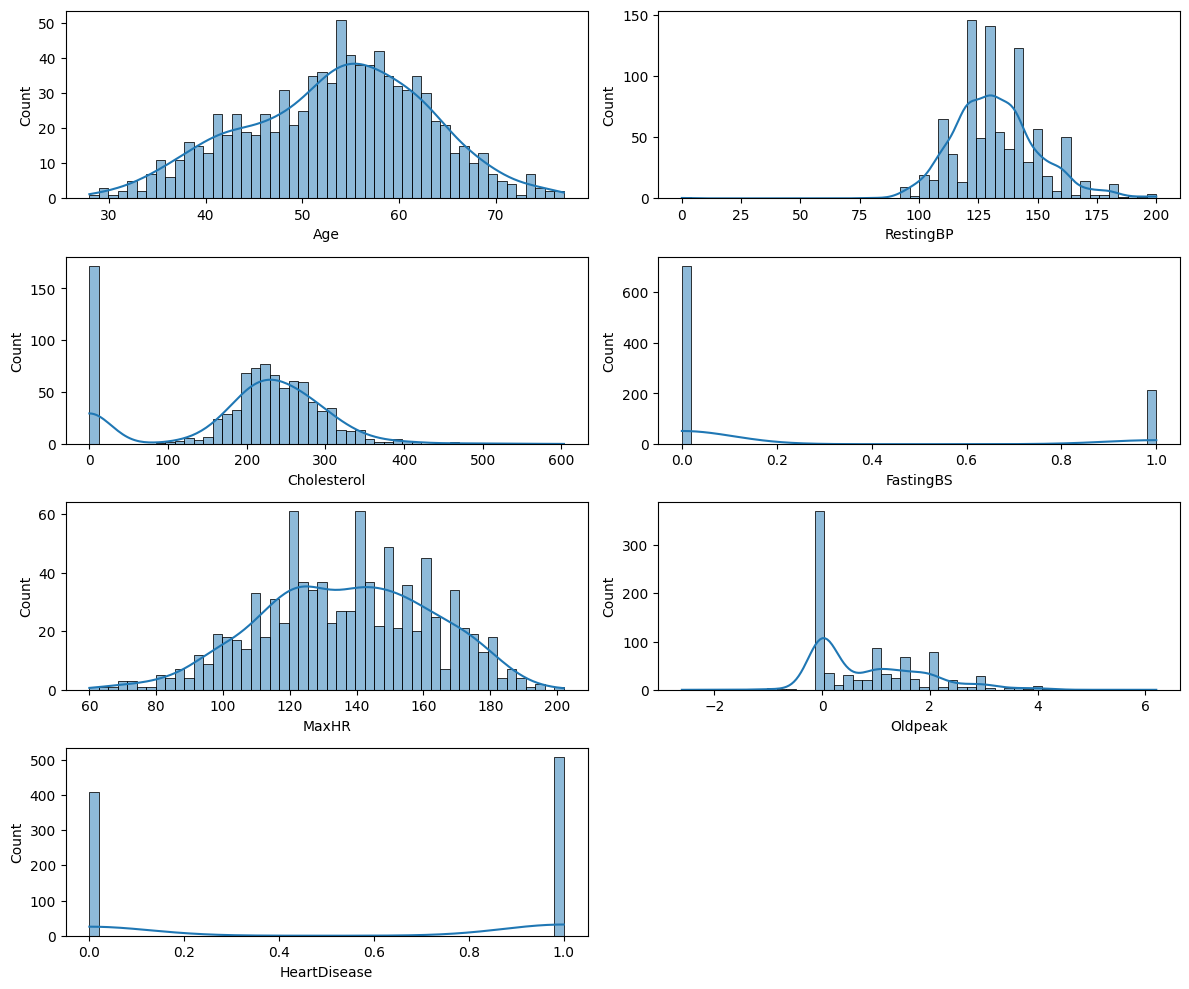

In [ ]:
num_col = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
           'HeartDisease']
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.flatten()


for i, column in enumerate(num_col):
    sns.histplot(df[column], ax=axes[i], bins=50, kde=True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

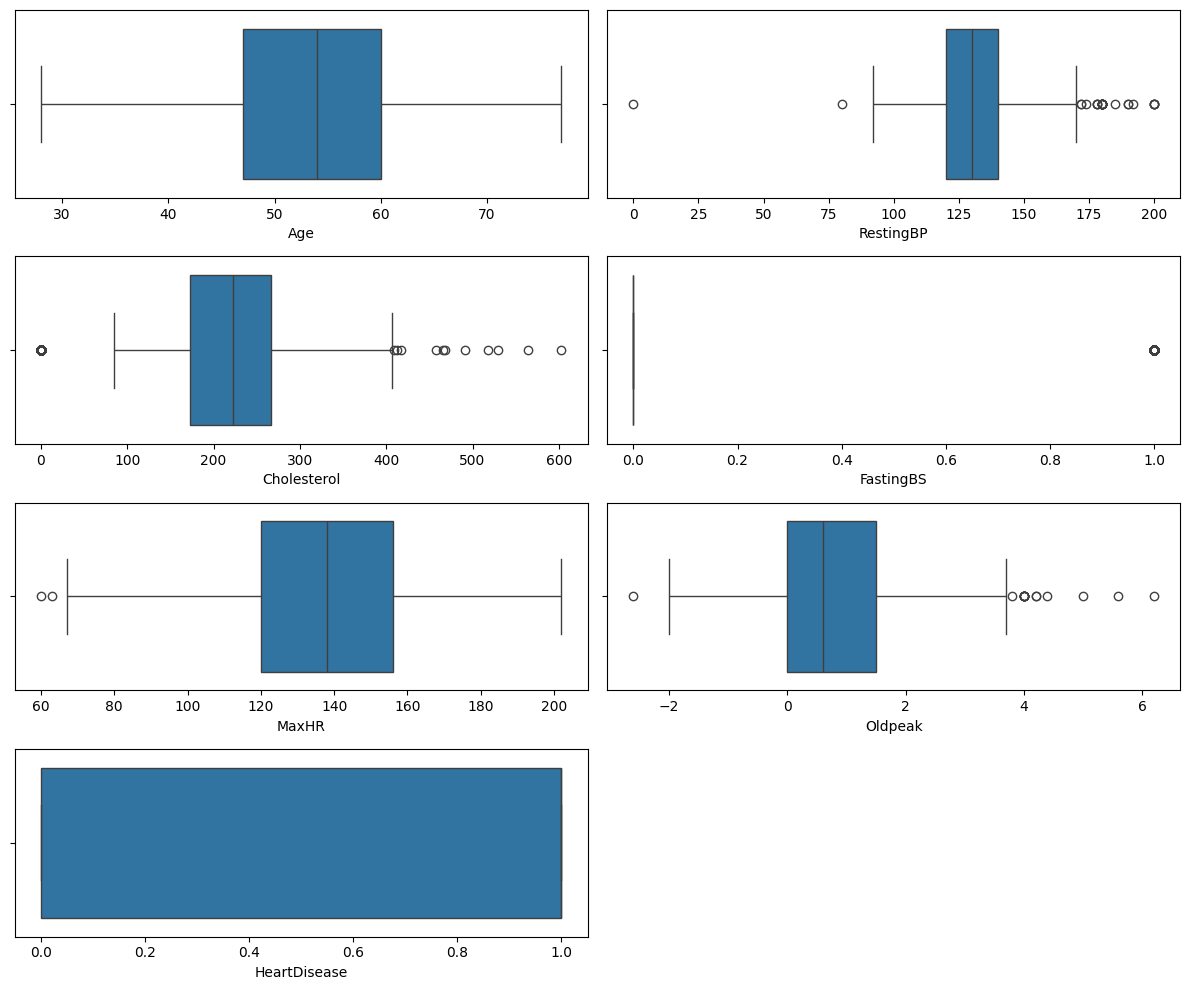

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.flatten()


for i, column in enumerate(num_col):
    sns.boxplot(x = df[column], ax=axes[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Correlation using Heatmap

<Axes: >

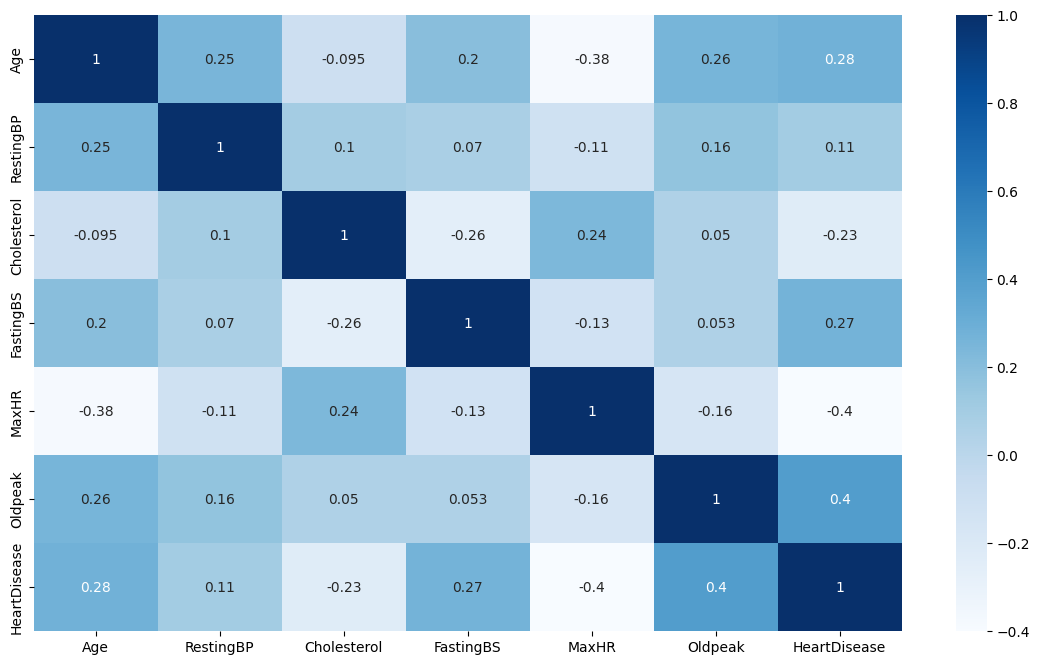

In [21]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')

Numeric Conclusion - Drop MaxHR. It is not necessary to train the model

# Categorical Data

In [25]:
df.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
155,56,M,ASY,155,342,1,Normal,150,Y,3.0,Flat,1
679,63,M,TA,145,233,1,LVH,150,N,2.3,Down,0
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
714,50,F,ATA,120,244,0,Normal,162,N,1.1,Up,0
385,61,M,ASY,150,0,0,Normal,105,Y,0.0,Flat,1
632,53,M,ASY,140,203,1,LVH,155,Y,3.1,Down,1
61,43,F,NAP,150,254,0,Normal,175,N,0.0,Up,0
49,41,M,ASY,110,289,0,Normal,170,N,0.0,Flat,1
711,66,M,ASY,120,302,0,LVH,151,N,0.4,Flat,0
871,61,M,NAP,150,243,1,Normal,137,Y,1.0,Flat,0


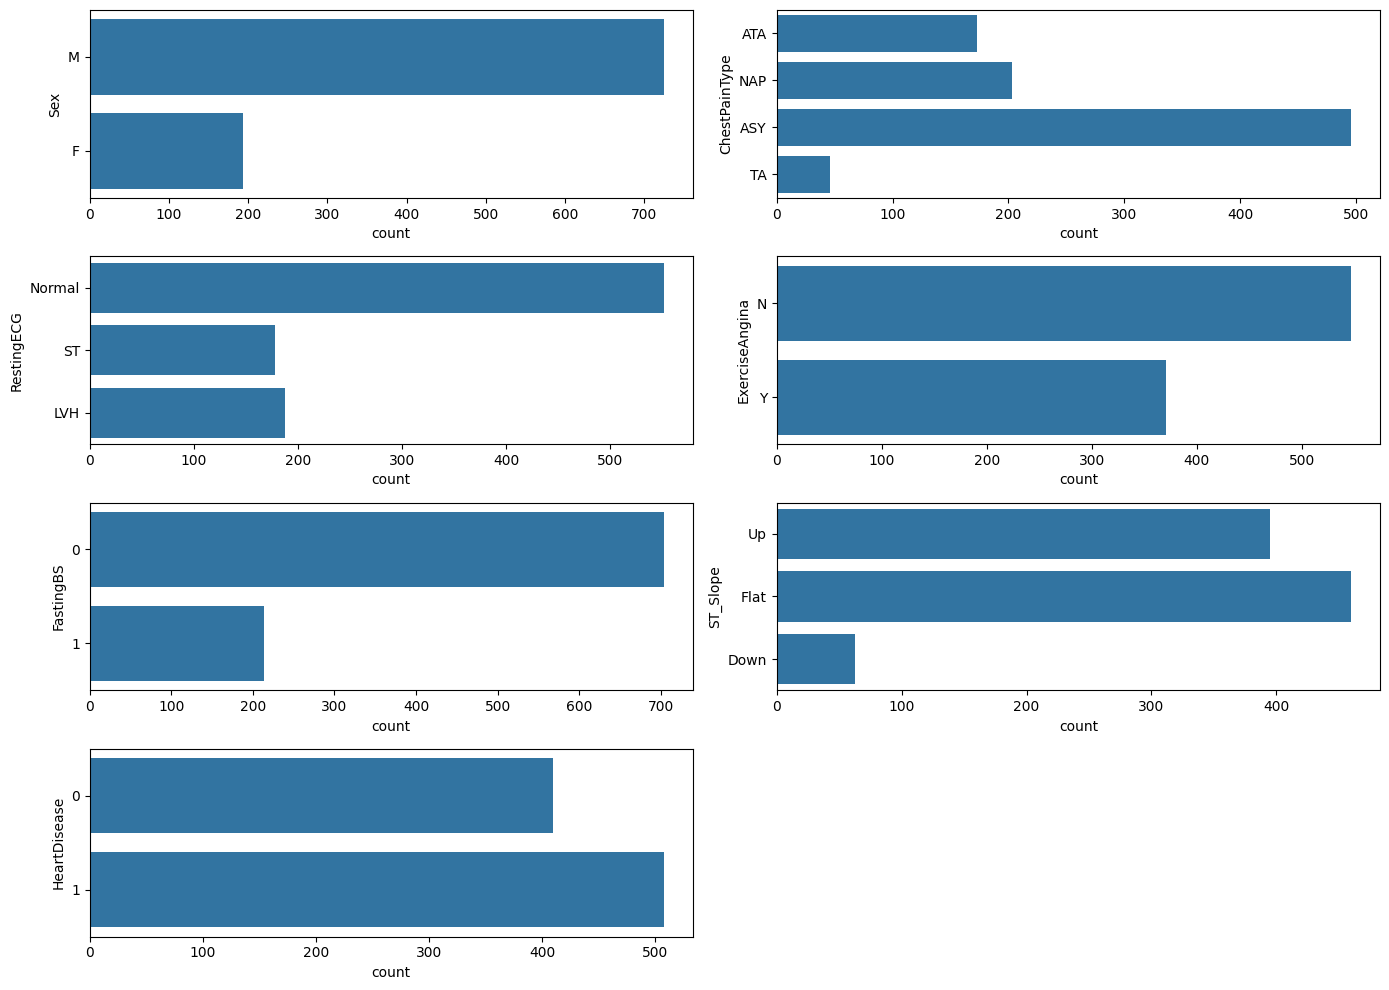

In [28]:
cat_col = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'FastingBS','ST_Slope','HeartDisease']

fig, axes = plt.subplots(4, 2, figsize=(14, 10))
axes = axes.flatten() 

for i, column in enumerate(cat_col):
    sns.countplot(y=df[column], ax=axes[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Feature Engineering